#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#### Loading the Dataset

In [2]:
# I have used the Featured Engineered data
train=pd.read_csv('Feature Engineered Data.csv')
train.shape

(5982, 14)

In [3]:
# Droping the Repeated Data 
data=train.drop(['Price_log','Kilometers_Driven'],1)
data.shape

(5982, 12)

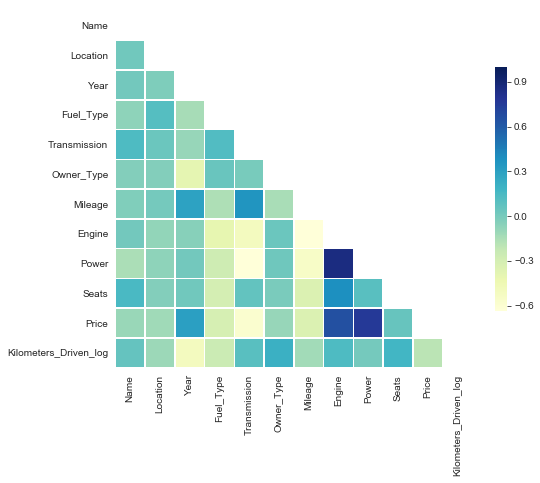

In [4]:
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(8, 9))
sns.heatmap(corr, mask=mask, cmap="YlGnBu",square=True,  linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

###### Model Building and Finding feature importance by Random Forest

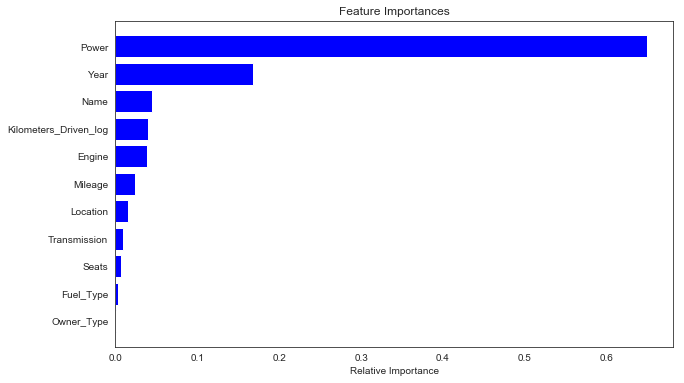

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Price', axis=1), data['Price'], test_size=0.20, random_state=0)

# fitting the model
model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# plotting feature importances
features = data.drop('Price', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Automated feature selection

###### variable would have extremely low variance and would be not at all useful for predicting the target variable

In [14]:
from sklearn.feature_selection import VarianceThreshold

X = data.drop('Price', axis=1)
selector = VarianceThreshold()
print("Original feature shape:", X.shape)

new_X = selector.fit_transform(X)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (5982, 11)
Transformed feature shape: (5982, 11)


#### Univariate feature selection

###### This includes analysis of variance (ANOVA), linear regressions and t-tests of means

In [16]:
from sklearn.feature_selection import SelectKBest
X = data.drop('Price', axis=1)
y = data['Price']
selector = SelectKBest(k=6)
print("Original feature shape:", X.shape)
new_X = selector.fit_transform(X, y)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (5982, 11)
Transformed feature shape: (5982, 6)


In [17]:
new_X

array([[2.010e+03, 0.000e+00, 1.000e+00, 2.660e+01, 9.980e+02, 5.816e+01],
       [2.015e+03, 1.000e+00, 1.000e+00, 1.967e+01, 1.582e+03, 1.262e+02],
       [2.011e+03, 4.000e+00, 1.000e+00, 1.820e+01, 1.199e+03, 8.870e+01],
       ...,
       [2.012e+03, 1.000e+00, 1.000e+00, 1.400e+01, 2.498e+03, 1.120e+02],
       [2.013e+03, 4.000e+00, 1.000e+00, 1.890e+01, 9.980e+02, 6.710e+01],
       [2.011e+03, 1.000e+00, 1.000e+00, 2.544e+01, 9.360e+02, 5.760e+01]])

#### Recursive feature elimination

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
X_normalized = preprocessing.normalize(X, norm='l2')
y = y
estimator = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
selector = RFECV(estimator, step=1, cv=2)
selector = selector.fit(X, y)
print("Features selected", selector.support_)
print("Feature ranking", selector.ranking_)

Features selected [ True  True  True  True  True False  True  True  True  True  True]
Feature ranking [1 1 1 1 1 2 1 1 1 1 1]


#### Automated feature engineering

In [21]:
data['id'] = data.index + 1

In [25]:
import featuretools as ft
es = ft.EntitySet(id = 'data')
es.entity_from_dataframe(entity_id = 'data', dataframe = data, index = 'id')

Entityset: data
  Entities:
    data [Rows: 5982, Columns: 13]
  Relationships:
    No relationships

In [33]:
feature_matrix, feature_names = ft.dfs(entityset=es, trans_primitives=['add_numeric'],
target_entity = 'data', 
max_depth = 1, 
verbose = 1, 
n_jobs = 3,)

Built 78 features
Elapsed: 00:00 | Progress:   0%|                                                                                       EntitySet scattered to 3 workers in 6 seconds
Elapsed: 00:00 | Progress:  32%|███████████████████████████▌                                                           

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:49381 remote=tcp://127.0.0.1:49354>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:49385 remote=tcp://127.0.0.1:49354>


Elapsed: 00:00 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [34]:
feature_matrix.columns

Index(['Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Kilometers_Driven_log',
       'Name + Seats', 'Engine + Owner_Type',
       'Kilometers_Driven_log + Mileage', 'Kilometers_Driven_log + Owner_Type',
       'Power + Price', 'Mileage + Owner_Type', 'Name + Price',
       'Kilometers_Driven_log + Seats', 'Engine + Seats', 'Engine + Fuel_Type',
       'Mileage + Name', 'Owner_Type + Power',
       'Kilometers_Driven_log + Location',
       'Kilometers_Driven_log + Transmission', 'Fuel_Type + Location',
       'Mileage + Transmission', 'Price + Seats',
       'Kilometers_Driven_log + Name', 'Fuel_Type + Name', 'Name + Year',
       'Location + Name', 'Seats + Year', 'Engine + Year', 'Engine + Location',
       'Location + Power', 'Power + Transmission', 'Engine + Price',
       'Fuel_Type + Kilometers_Driven_log', 'Engine + Mileage',
       'Mileage + Power', 'Location + Owner_Type', 'Location + Seats',
   

###### Reference: https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d